In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('Cancer_dataset1.csv')

In [3]:
#printing first 5 rows
df.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [4]:
#checking the dypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   outcome                  198 non-null    object 
 2   time                     198 non-null    int64  
 3   mean_radius              194 non-null    float64
 4   mean_texture             194 non-null    float64
 5   mean_perimeter           198 non-null    float64
 6   mean_area                198 non-null    float64
 7   mean_smoothness          198 non-null    float64
 8   mean_compactness         198 non-null    float64
 9   mean_concavity           198 non-null    float64
 10  mean_concave_points      198 non-null    float64
 11  mean_symmetry            198 non-null    float64
 12  mean_fractal_dimension   198 non-null    float64
 13  se_radius                198 non-null    float64
 14  se_texture               1

In [5]:
#Checking nulls
df.isnull().sum()

id                         0
outcome                    0
time                       0
mean_radius                4
mean_texture               4
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            4
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
tumor_size                 0
lymph_node_sta

In [6]:
#removing null values
if df.isnull().sum().max() > 0:  
    df.dropna(inplace=True) 

1A

In [7]:
#assigning the numerical variables in the data
numerical_variables = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness", "mean_compactness", "mean_concavity"]
summarize_stats = df[numerical_variables].describe()
print(summarize_stats)

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   182.000000    182.000000      182.000000   182.000000   
mean     17.481648     22.446154      115.316538   977.592857   
std       3.156405      4.362940       21.366880   353.984689   
min      10.950000     10.380000       71.900000   361.600000   
25%      15.105000     19.412500       99.010000   711.150000   
50%      17.290000     21.910000      113.700000   929.100000   
75%      19.580000     25.067500      129.650000  1203.250000   
max      27.220000     39.280000      182.100000  2250.000000   

       mean_smoothness  mean_compactness  mean_concavity  
count       182.000000        182.000000      182.000000  
mean          0.102592          0.142698        0.157414  
std           0.012661          0.051364        0.072140  
min           0.074970          0.046050        0.023980  
25%           0.093840          0.107975        0.106075  
50%           0.101800          0.131300        0.152050  
7

1B

In [8]:
#Summarize the statistics of the categorical variable "outcome"
outcome_summary = df['outcome'].describe()
#printing statistics
print(outcome_summary)

count     182
unique      2
top         N
freq      141
Name: outcome, dtype: object


1C

In [9]:
#Encode otcome variable from categorical to numerical datatype
df['outcome'] = df['outcome'].map({'N':0, 'R':1})
#fetching data
df.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


1D

In [10]:
# select only numerical variables from the dtaaset
numerical_df = df.select_dtypes(include = 'number')
# calculate correlation among numerical variables
correlation_matrix = numerical_df.corr()
#print correaltion matrxi
print(correlation_matrix)

                               id   outcome      time  mean_radius  \
id                       1.000000 -0.001493 -0.148315     0.099644   
outcome                 -0.001493  1.000000 -0.372360     0.181475   
time                    -0.148315 -0.372360  1.000000    -0.323739   
mean_radius              0.099644  0.181475 -0.323739     1.000000   
mean_texture             0.062385 -0.076152 -0.273087     0.133378   
mean_perimeter           0.101667  0.179957 -0.323807     0.995767   
mean_area                0.082467  0.194930 -0.324266     0.992878   
mean_smoothness         -0.018128 -0.005898  0.172552    -0.140845   
mean_compactness         0.067752 -0.024067  0.033556     0.165863   
mean_concavity           0.072759  0.020377 -0.122202     0.475948   
mean_concave_points      0.100401  0.098388 -0.148006     0.661575   
mean_symmetry           -0.038512 -0.111000  0.200576    -0.015974   
mean_fractal_dimension   0.029350 -0.137079  0.270203    -0.394443   
se_radius           

In [11]:
#find redundant features by using the corealtions
correlation_strength = 0.95
redundant_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_number = correlation_matrix.iloc[i, j]
        if abs(corr_number) > correlation_strength:
            redundant_pairs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr_number
            ))
#print the redudant pairs
for var1, var2, corr in redundant_pairs:
    print(f"{var1} and {var2}: correlation = {corr:.4f}")

mean_radius and mean_perimeter: correlation = 0.9958
mean_radius and mean_area: correlation = 0.9929
mean_perimeter and mean_area: correlation = 0.9903
se_radius and se_perimeter: correlation = 0.9719
se_radius and se_area: correlation = 0.9550
worst_radius and worst_perimeter: correlation = 0.9851
worst_radius and worst_area: correlation = 0.9882
worst_perimeter and worst_area: correlation = 0.9741


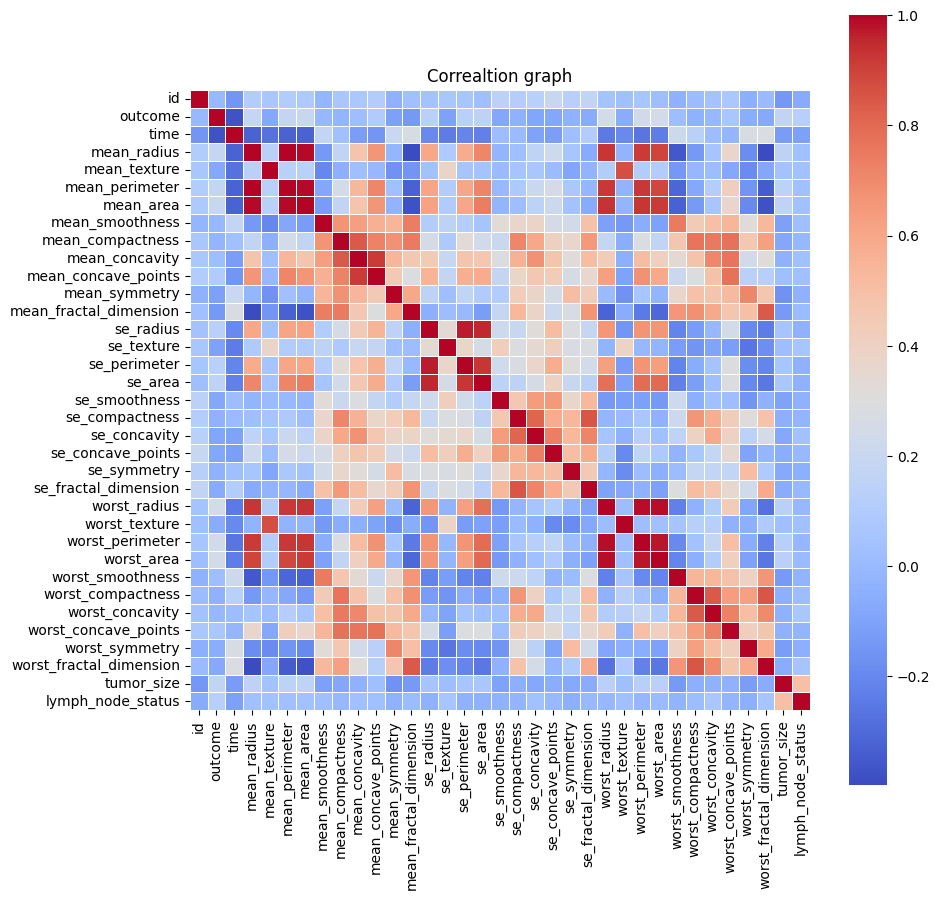

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot = False, cmap='coolwarm', square = True, linewidth = 0.5)
plt.title('Correaltion graph')
plt.show()

1E

In [13]:
#correaltion between mean_perimeter nd se_perimeter
correlation = df["mean_perimeter"].corr(df["se_perimeter"])
correlation

0.60668619726589

2A

In [14]:
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def split_dataset(X, Y, test_size = 0.3, random_state = None):
    """
    function to split the data set as 70% training and 30% testing sizes
    parameters:
    X - mean area
    Y- Binary likelihood of breast cancer
    test_size - the value which dataset is divided
    random state - for consistent data splits
    
    """
    #set random seed 
    np.random.seed(random_state)
    a = len(X)
    test_size = int(a * test_size)
    shuffled_indices = np.random.permutation(a)
    train_indices = shuffled_indices[test_size:]
    test_indices = shuffled_indices[:test_size]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

def train_logistic_regression(X, Y, lr = 0.00001, iterations_count = 1000):
    """ trianing model using gradient descent
        X -- feature variabels
        Y -- target variables
        lr -learning rate 
        iterations_count- total itearatons"""
    samples_size, feature_size = X.shape # dataset dimensions
    #initializing weights as zeros
    weight = np.zeros((feature_size, 1))
    #initializing bias as zero
    bias = 0
    cost_storage = []

    for i in range(iterations_count):
        #compute the predictions
        z = np.dot(X, weight) + bias
        #Apply to the sigmoid functionsnip
        predictions = sigmoid(z)
        # Compute cost and store the history
        cost = -1/samples_size * np.sum(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        cost_storage.append(cost)

        #gradints for weights and bias
        w_gradient = (1 / samples_size) * np.dot(X.T, (predictions - Y))
        b_gradient = (1 / samples_size) * np.sum(predictions - Y)

        #updating weights and bias
        weight -= lr * w_gradient
        bias -= lr * b_gradient
    return weight,bias,cost_storage

# predict function to return the probabilities
#below 0.45 is non recurrence and above is recurrence
def predict(X, weight, bias):
    z = np.dot(X,weight) + bias
    probabilities = sigmoid(z)
    binary_pred  = (probabilities >= 0.45).astype(int)
    return probabilities, binary_pred

In [15]:
# trianing the model with one feature
X = df[["mean_area"]].values
Y = (df["outcome"].values.reshape(-1, 1))

#using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)

#log cost for everuy 100 iterations count
print("Cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"Iteration {i}: Cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\nprobabilty of breast cancer recurrence with mean_area feature:\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with mean_area feature(binary classification):\n")
print(binary_preds.T)

Cost storage history:

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.5958386777998574
Iteration 200: Cost = 0.5957552539559712
Iteration 300: Cost = 0.595752738669847
Iteration 400: Cost = 0.59575242694776
Iteration 500: Cost = 0.5957521763776816
Iteration 600: Cost = 0.5957519274423408
Iteration 700: Cost = 0.5957516784905115
Iteration 800: Cost = 0.5957514294765007
Iteration 900: Cost = 0.5957511803990776

probabilty of breast cancer recurrence with mean_area feature:

[[0.36958009 0.39508575 0.37221477 0.36746099 0.31464343 0.34085996
  0.35697691 0.36881663 0.35589071 0.37282779 0.29322771 0.33020609
  0.1625233  0.28722528 0.37414035 0.33953546 0.36110099 0.3811429
  0.3626318  0.29549745 0.28901829 0.28041399 0.34859396 0.30901575
  0.36136994 0.28916801 0.37884306 0.31057341 0.36490793 0.29930291
  0.24719966 0.3037522  0.33824608 0.39046414 0.32064338 0.4327068
  0.36514432 0.3438615  0.3983461  0.40187812 0.35838278 0.33681263
  0.4344064  0.29899744 0.2846965

2B

In [16]:
#calculte TP,FP,TN,FN from true and predicted values
def compute_confusion_matrix(Y_true, Y_pred):
    TP = np.sum((Y_true == 1) & (Y_pred ==1))  #true positives
    FP = np.sum((Y_true == 0) & (Y_pred ==1))  #False positives
    TN = np.sum((Y_true == 0) & (Y_pred ==0))  #true negatves
    FN = np.sum((Y_true == 1) & (Y_pred ==0))  #Flase negatives
    return TP,FP,TN,FN

#function to calculat evaluation metrices
def compute_evaluation_metrices(TP, FP, TN, FN):
    """ calculate acuracy precisuion recall f1 score 
    adding small constant to denomitaotr to avoid division by zero"""
    accuracy = (TP + TN) / (TP+FP+TN+FN)
    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1_score  = 2 * precision * recall / (precision + recall + 1e-10)
    return accuracy, precision, recall, f1_score

confusion matrix values:
TP: 0, FP: 0, TN: 44, FN: 10


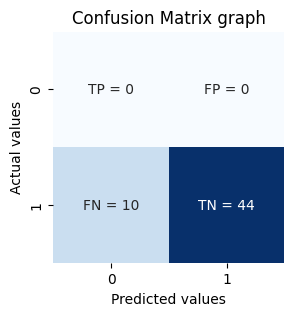


Evaluation Metrics:
Accuracy : 0.8148148148148148
Precision:  0.0
Recall  : 0.0
F1 Score : 0.0


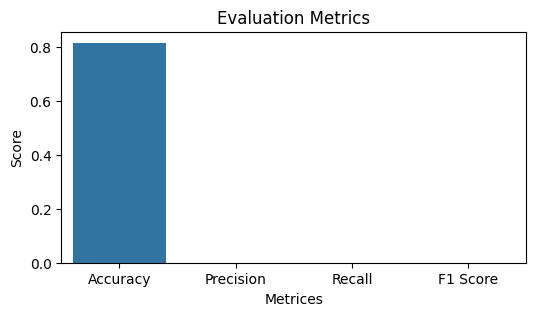

In [17]:
# passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)
#printing results of confusion matrix
print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#passing parameters to the evaluation matrix function
accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)
#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()

3A

In [18]:
# trianing the model with multiple features
features = [
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_fractal_dimension',
    'se_perimeter', 'se_texture', 'se_area']
X = df[features].values
Y = (df["outcome"].values.reshape(-1, 1))

#using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)

#store the cost for everuy 100 iterations count
print("Cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"iteration {i}: cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\n:probabilty of breast cancer recurrence with 12 features as input\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with 12 features as input(binary classification):\n")
print(binary_preds.T)

Cost storage history:

iteration 0: cost = 0.6931471805599453
iteration 100: cost = 0.5998604892759051
iteration 200: cost = 0.5971410880084501
iteration 300: cost = 0.5948552029828402
iteration 400: cost = 0.5929910752163008
iteration 500: cost = 0.5914731035280287
iteration 600: cost = 0.5902312034268689
iteration 700: cost = 0.5892099867087155
iteration 800: cost = 0.5883667333839236
iteration 900: cost = 0.5876682177981121

:probabilty of breast cancer recurrence with 12 features as input

[[0.32081555 0.31587738 0.28052023 0.28213398 0.4241706  0.42368572
  0.32597933 0.34570806 0.33468846 0.34618821 0.40967837 0.32892031
  0.56729337 0.45944141 0.33486671 0.42337077 0.345012   0.32333703
  0.43003516 0.36709175 0.46097242 0.40056367 0.31998465 0.40557492
  0.35524697 0.41643677 0.41544    0.42027244 0.32204112 0.38583079
  0.62869554 0.41367154 0.31417176 0.30992886 0.37271839 0.30930097
  0.33048687 0.37830579 0.34563459 0.31905098 0.33871875 0.36454392
  0.30262247 0.39606898 0

confusion matrix values:
TP: 2, FP: 3, TN: 41, FN: 8


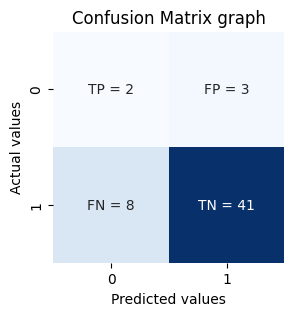


Evaluation Metrics:
Accuracy : 0.7962962962962963
Precision:  0.399999999992
Recall  : 0.199999999998
F1 Score : 0.26666666661866667


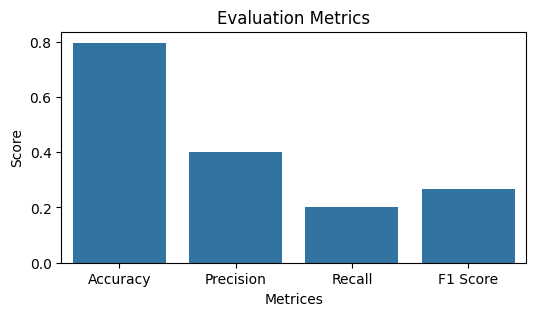

In [19]:
#passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)
#printing results of confusion matrix
print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#passing parameters to the evaluation matrix function
accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)
#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()

3B

In [20]:
#using the features mentioned in 3a
features = [
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_fractal_dimension',
    'se_perimeter', 'se_texture', 'se_area']
#initialize the variables to check the best fetaure subset and accuracy
top_features = [] #list to store the best combination of fetaures
best_accuracy = 0.0

#firstly we clacualte accuracy for each fetaure individually
print("performanece evaluation of single features \n")
single_feature_values = []

for feature in features:
    #assign  input and target varibales
    X = df[[feature]].values
    Y = (df["outcome"].values.reshape(-1, 1))

    #splitting the dataset into 80 and 20 percent using random state for reproduciblity
    X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

    #train logistic regression model
    weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)

    # Predict proababitly and binaries using predict function
    pred_probs, binary_preds = predict(X_test, weight, bias)

    #passsing parameterrs to the confusion matrix function
    TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)

    accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)

    #print the accuracy for the current fetaure
    print(f"feature_name: {feature.ljust(25)} Accuracy: {accuracy:.6f}")

    # store the results of each fetaure and the accuracy
    single_feature_values.append((feature, accuracy))

    #update the best fteaure if the new fetaure is having higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        top_features = [feature]

#adding second feature to improve accuracy
remaining_features = [f for f in features if f not in top_features]
count = 2

while remaining_features:
    print(f"\n step {count}: adding to {top_features} \n")
    current_top_feature = None
    current_best_accuracy = best_accuracy
    for feature in remaining_features:
        current_features = top_features + [feature]
        #assign  input and target varibales
        X = df[current_features].values
        Y = (df["outcome"].values.reshape(-1, 1))

        #splitting the dataset into 70 and 30 percent using random state for reproduciblity
        X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

        #train logistic regression model
        weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)

        # Predict proababitly and binaries using predict function
        pred_probs, binary_preds = predict(X_test, weight, bias)

        #passsing parameterrs to the confusion matrix function
        TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)

        accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)

        #print the accuracy for the current set of fetaure
        print(f"calculating: {str(current_features).ljust(45)} Accuracy: {accuracy:.6f}")

        #update the best fteaure if the new fetaure is having higher accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            top_features = [feature]
        
        
    #checking any improvement in performance        
    if current_top_feature:
        top_features.append(current_top_feature)
        best_accuracy = current_best_accuracy
        remaining_features.remove(current_top_feature)
        print(f"\n step {count} Top feature: {top_features} Accuracy: {best_accuracy:.6f}\n")
        count += 1
    else:
         print("\n No accuracy improvemnt till now, stopping the forward selection process. \n")
         break

#top selected features in forward selection
print(" top features subset")
print(f" feature : {top_features} Accuracy : {best_accuracy:.6f}")



performanece evaluation of single features 

feature_name: mean_radius               Accuracy: 0.814815
feature_name: mean_texture              Accuracy: 0.814815
feature_name: mean_perimeter            Accuracy: 0.814815
feature_name: mean_area                 Accuracy: 0.814815
feature_name: mean_smoothness           Accuracy: 0.185185
feature_name: mean_compactness          Accuracy: 0.185185
feature_name: mean_concavity            Accuracy: 0.185185
feature_name: mean_concave_points       Accuracy: 0.185185
feature_name: mean_fractal_dimension    Accuracy: 0.185185
feature_name: se_perimeter              Accuracy: 0.185185
feature_name: se_texture                Accuracy: 0.185185
feature_name: se_area                   Accuracy: 0.777778

 step 2: adding to ['mean_radius'] 

calculating: ['mean_radius', 'mean_texture']               Accuracy: 0.814815
calculating: ['mean_radius', 'mean_perimeter']             Accuracy: 0.814815
calculating: ['mean_radius', 'mean_area']            

Cost storage history:

iteration 0: cost = 0.6931471805599453
iteration 100: cost = 0.6757928064119323
iteration 200: cost = 0.6610050575901609
iteration 300: cost = 0.6483959937869539
iteration 400: cost = 0.6376340304025555
iteration 500: cost = 0.6284373683161926
iteration 600: cost = 0.620567451688888
iteration 700: cost = 0.6138228311020099
iteration 800: cost = 0.6080336226985179
iteration 900: cost = 0.6030566327465416

:probabilty of breast cancer recurrence with forward selection process

[[0.38705285 0.39775505 0.38762099 0.38542117 0.36466285 0.37751292
  0.38117679 0.3859175  0.38018901 0.38691086 0.35734541 0.36730159
  0.30651991 0.35364283 0.38875818 0.37407319 0.38365052 0.39203433
  0.38450005 0.35569769 0.3556291  0.35125232 0.37723166 0.36065097
  0.38365052 0.35289073 0.38954071 0.36383124 0.38492508 0.35810175
  0.33793862 0.36113414 0.37183365 0.3949626  0.36127224 0.4183531
  0.38386283 0.37659912 0.40041046 0.40148866 0.38117679 0.37365286
  0.41740673 0.3580329

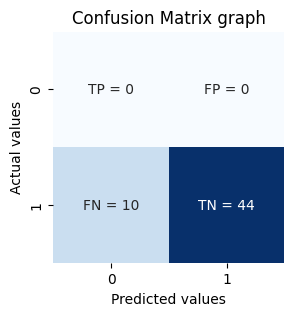


Evaluation Metrics:
Accuracy : 0.8148148148148148
Precision:  0.0
Recall  : 0.0
F1 Score : 0.0


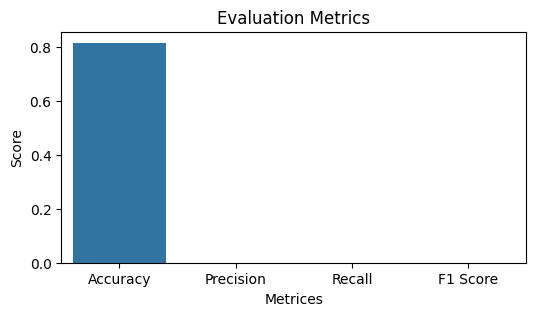

In [21]:
#passing input and target variables
X = df[top_features].values
Y = (df["outcome"].values.reshape(-1, 1))

#splitting the dataset into 70 and 30 percent using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)
#store the cost for everuy 100 iterations count
print("Cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"iteration {i}: cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\n:probabilty of breast cancer recurrence with forward selection process\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with forward selection process(binary classification):\n")
print(binary_preds.T)

#passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)

accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)

print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()

4A

Cost storage history:

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.675792819504074
Iteration 200: Cost = 0.6610051048833382
Iteration 300: Cost = 0.6483960899061523
Iteration 400: Cost = 0.6376341850075751
Iteration 500: Cost = 0.6284375873101521
Iteration 600: Cost = 0.6205677381666121
Iteration 700: Cost = 0.6138231860863624
Iteration 800: Cost = 0.6080340457072833
Iteration 900: Cost = 0.6030571222258175

:probabilty of breast cancer recurrence with top features  in forward selection with regulaisation as input

[[0.38705322 0.39775538 0.38762136 0.38542154 0.36466328 0.37751332
  0.38117718 0.38591787 0.3801894  0.38691124 0.35734587 0.36730202
  0.3065205  0.3536433  0.38875855 0.3740736  0.3836509  0.39203469
  0.38450043 0.35569815 0.35562957 0.3512528  0.37723206 0.36065142
  0.3836509  0.35289121 0.38954107 0.36383168 0.38492545 0.35810221
  0.33793914 0.36113459 0.37183407 0.39496295 0.36127269 0.41835337
  0.38386321 0.37659952 0.40041079 0.40148898 0.3811

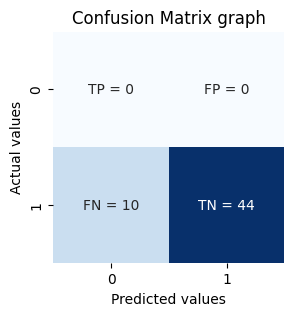


Evaluation Metrics:
Accuracy : 0.8148148148148148
Precision:  0.0
Recall  : 0.0
F1 Score : 0.0


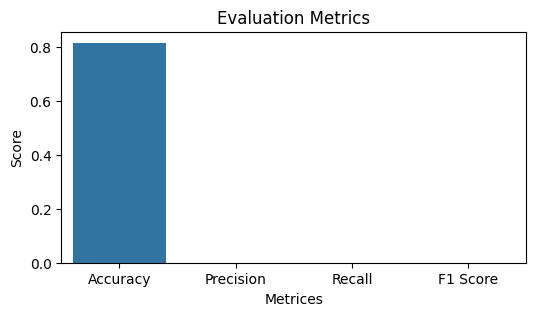

In [22]:
def train_logistic_regression_reg(X, Y, lr = 0.00001, iterations_count = 1000, reg_value = 0.1):
    """ trianing model using gradient descent
        X -- feature variabels
        Y -- target variables
        lr -- learning rate
        iterations_count - total num of iteration
        reg_value - used to avoid overfitting  """
    samples_size, feature_size = X.shape # dataset dimensions
    #initializing weights as zeros
    weight = np.zeros((feature_size, 1))
    #initializing bias as zero
    bias = 0
    cost_storage = []

    for i in range(iterations_count):
        #compute the predictions
        z = np.dot(X, weight) + bias
        #Apply to the sigmoid function
        predictions = sigmoid(z)
        # Compute cost with L2 regularisation and store the history
        cost = -1/samples_size * np.sum(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        reg_param = (reg_value / (2 * samples_size)) * np.sum(np.square(weight))
        total_cost = cost + reg_param
        cost_storage.append(total_cost)

        #gradints for weights and bias
        w_gradient = (1 / samples_size) * np.dot(X.T, (predictions - Y)) + (reg_value / samples_size) * weight
        b_gradient = (1 / samples_size) * np.sum(predictions - Y)

        #updating weights and bias
        weight -= lr * w_gradient
        bias -= lr * b_gradient
        
    return weight,bias,cost_storage

# passing input and target fetaures
X = df[top_features].values
Y = (df["outcome"].values.reshape(-1, 1))

#using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression_reg(X_train, Y_train)

#log cost for everuy 100 iterations count
print("Cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"Iteration {i}: Cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\n:probabilty of breast cancer recurrence with top features  in forward selection with regulaisation as input\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with top features in forwad selection  with regularisation as input(binary classification):\n")
print(binary_preds.T)


#passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)
#printing results of confusion matrix
print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#passing parameters to the evaluation matrix function
accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)
#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()

4B.II

cost storage history:

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.693077399239705
Iteration 200: Cost = 0.6930076523625681
Iteration 300: Cost = 0.6929379399115227
Iteration 400: Cost = 0.6928682618695642
Iteration 500: Cost = 0.6927986182196946
Iteration 600: Cost = 0.6927290089449237
Iteration 700: Cost = 0.6926594340282675
Iteration 800: Cost = 0.6925898934527494
Iteration 900: Cost = 0.6925203872013994

:probabilty of breast cancer recurrence with top features  in forward selection with fetaure scalingas input

[[0.49925637 0.49918769 0.49925271 0.4992669  0.49940244 0.49931819
  0.49929438 0.4992637  0.49930079 0.49925729 0.49945098 0.49938504
  0.49980218 0.4994757  0.49924538 0.49934062 0.49927835 0.49922432
  0.49927286 0.49946196 0.49946242 0.49949173 0.49932002 0.499429
  0.49927835 0.49948074 0.49924035 0.49940793 0.49927011 0.49944594
  0.49958193 0.49942579 0.49935528 0.49920555 0.49942488 0.49905719
  0.49927698 0.49932414 0.49917075 0.49916388 0.49929

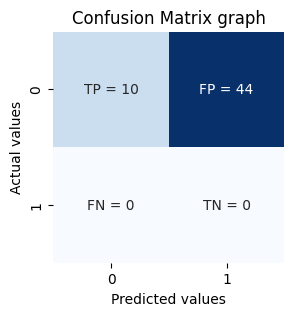


Evaluation Metrics:
Accuracy : 0.18518518518518517
Precision:  0.18518518518484225
Recall  : 0.99999999999
F1 Score : 0.31249999997265626


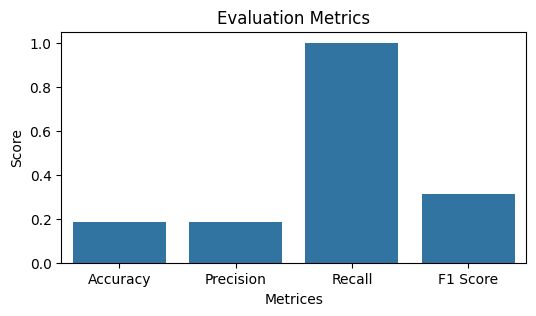

In [23]:
# Feature Scaling (Standardization)
def standardize_features(X):
        return (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = df[top_features].values
X = standardize_features(X)
Y = (df["outcome"].values.reshape(-1, 1))

#using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression(X_train, Y_train)

#log cost for everuy 100 iterations count
print("cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"Iteration {i}: Cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\n:probabilty of breast cancer recurrence with top features  in forward selection with fetaure scalingas input\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with top features in forwad selection with feature scaling as input(binary classification):\n")
print(binary_preds.T)


#passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)
#printing results of confusion matrix
print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#passing parameters to the evaluation matrix function
accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)
#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()

4B

Cost storage history:

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.675792819504074
Iteration 200: Cost = 0.6610051048833382
Iteration 300: Cost = 0.6483960899061523
Iteration 400: Cost = 0.6376341850075751
Iteration 500: Cost = 0.6284375873101521
Iteration 600: Cost = 0.6205677381666121
Iteration 700: Cost = 0.6138231860863624
Iteration 800: Cost = 0.6080340457072833
Iteration 900: Cost = 0.6030571222258175

:probabilty of breast cancer recurrence with top features in forward selection with noramlisation and new cost

[[0.38705322 0.39775538 0.38762136 0.38542154 0.36466328 0.37751332
  0.38117718 0.38591787 0.3801894  0.38691124 0.35734587 0.36730202
  0.3065205  0.3536433  0.38875855 0.3740736  0.3836509  0.39203469
  0.38450043 0.35569815 0.35562957 0.3512528  0.37723206 0.36065142
  0.3836509  0.35289121 0.38954107 0.36383168 0.38492545 0.35810221
  0.33793914 0.36113459 0.37183407 0.39496295 0.36127269 0.41835337
  0.38386321 0.37659952 0.40041079 0.40148898 0.3

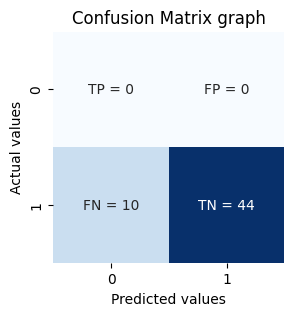


Evaluation Metrics:
Accuracy : 0.8148148148148148
Precision:  0.0
Recall  : 0.0
F1 Score : 0.0


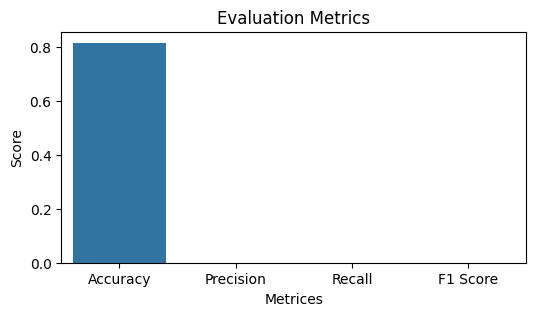

In [24]:
def train_logistic_regression_reg_cost(X, Y, lr = 0.00001, iterations_count = 1000, reg_value = 0.1):
    """ trianing model using gradient descent
        X -- feature variabels
        Y -- target variables
        lr -- learning rate
        iterations_count - total num of iteration
        reg_value - used to avoid overfitting
        """
    samples_size, feature_size = X.shape # dataset dimensions
    #initializing weights as zeros
    weight = np.zeros((feature_size, 1))
    #initializing bias as zero
    bias = 0
    cost_storage = []

    for i in range(iterations_count):
        #compute the predictions
        z = np.dot(X, weight) + bias
        #Apply to the sigmoid function
        predictions = sigmoid(z)
        # Compute cost with L2 regularisation and store the history
        cost = 1/(2 * samples_size) * np.sum((predictions - Y) **2)
        reg_param = (reg_value / (2 * samples_size)) * np.sum(np.square(weight))
        total_cost = cost + reg_param
        cost_storage.append(total_cost)

        #gradints for weights and bias
        w_gradient = (1 / samples_size) * np.dot(X.T, (predictions - Y)) + (reg_value / samples_size) * weight
        b_gradient = (1 / samples_size) * np.sum(predictions - Y)

        #updating weights and bias
        weight -= lr * w_gradient
        bias -= lr * b_gradient
        
    return weight,bias,cost_storage
#passsing input and the target features
X = df[top_features].values
Y = (df["outcome"].values.reshape(-1, 1))

#using random state for reproduciblity
X_train, X_test, Y_train, Y_test = split_dataset(X, Y, test_size = 0.3, random_state = 42)

#train logistic regression model
weight, bias, cost_storage = train_logistic_regression_reg(X_train, Y_train)

#log cost for everuy 100 iterations count
print("Cost storage history:\n")
for i in range(0, len(cost_storage), 100):
    print(f"Iteration {i}: Cost = {cost_storage[i]}")

# Predict proababitly and binaries using predict function
pred_probs, binary_preds = predict(X_test, weight, bias)

print("\n:probabilty of breast cancer recurrence with top features in forward selection with noramlisation and new cost\n")
print(pred_probs.T)

print("\nprobabilty of breast cancer recurrence with top features in forwad selection wwith normalisaton and new cost(binary classification):\n")
print(binary_preds.T)


#passsing parameterrs to the confusion matrix function
TP, FP, TN, FN = compute_confusion_matrix(Y_test, binary_preds)
#printing results of confusion matrix
print("confusion matrix values:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

#plotting confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])
conf_labels = np.array([[f"TP = {TP}", f"FP = {FP}"],
                        [f"FN = {FN}", f"TN = {TN}"]])

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=conf_labels, fmt = "" ,cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix graph")
plt.show()

#passing parameters to the evaluation matrix function
accuracy, precision, recall, f1_score = compute_evaluation_metrices(TP, FP, TN, FN)
#printing the evaluation metrix values
print("\nEvaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision: ", precision)
print("Recall  :", recall)
print("F1 Score :", f1_score)

#plot evaluation matrix values
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(6, 3))
sns.barplot(x = names, y = values)
plt.title("Evaluation Metrics")
plt.xlabel("Metrices")
plt.ylabel("Score")
plt.show()